In [1031]:
# Import de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [1032]:
# Carregamento de Dados
test = pd.read_csv(r'C:\Users\Gui\Documents\GitHub\DAA-2025-2026\Datasets\test_data.csv', encoding='latin-1')
train = pd.read_csv(r'C:\Users\Gui\Documents\GitHub\DAA-2025-2026\Datasets\training_data.csv', encoding='latin-1')

### Vizualização dos dados e Feature Engineering


### DATASET test_data.csv


In [1033]:
test.head()

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,NaN
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,NaN
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0.0,NaN
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NaN
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,0.0,chuva fraca


In [1034]:
test.columns

Index(['city_name', 'record_date', 'AVERAGE_FREE_FLOW_SPEED',
       'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY',
       'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY',
       'AVERAGE_WIND_SPEED', 'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION',
       'AVERAGE_RAIN'],
      dtype='object')

In [1035]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                1500 non-null   object 
 1   record_date              1500 non-null   object 
 2   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 3   AVERAGE_TIME_DIFF        1500 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 5   LUMINOSITY               1500 non-null   object 
 6   AVERAGE_TEMPERATURE      1500 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 8   AVERAGE_HUMIDITY         1500 non-null   float64
 9   AVERAGE_WIND_SPEED       1500 non-null   float64
 10  AVERAGE_CLOUDINESS       901 non-null    object 
 11  AVERAGE_PRECIPITATION    1500 non-null   float64
 12  AVERAGE_RAIN             140 non-null    object 
dtypes: float64(8), object(5)
memory usage: 152.5+ KB


In [1036]:
test.isnull().sum()

city_name                     0
record_date                   0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS          599
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               1360
dtype: int64

In [1037]:
#Ver a percentagem de valores em falta na coluna AVERAGE_CLOUDINESS
missing = test['AVERAGE_CLOUDINESS'].isna().mean() * 100
print(f'{missing:.2f}% de valores em falta')

39.93% de valores em falta


### 40% quase, de valores NaN, não é viavel fazer drop, iamos perder metade do dataset quase.

<Axes: >

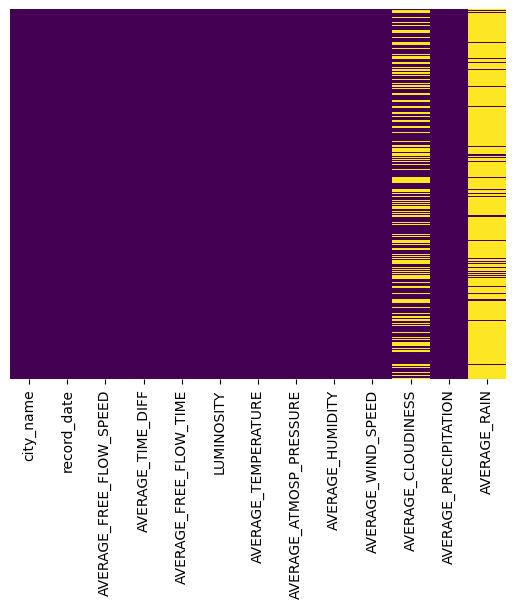

In [1038]:
#Ver heat map de valores nulos
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [1039]:
test['AVERAGE_CLOUDINESS'].head()

0            céu claro
1     nuvens dispersas
2                  NaN
3    céu pouco nublado
4                  NaN
Name: AVERAGE_CLOUDINESS, dtype: object

In [1040]:
test[test['AVERAGE_CLOUDINESS'].isnull()]

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0.0,NaN
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,0.0,chuva fraca
7,Porto,2019-05-20 19:00:00,34.7,19.1,68.3,LIGHT,17.0,1015.0,67.0,2.0,NaN,0.0,NaN
8,Porto,2019-07-12 06:00:00,46.5,1.3,75.4,LIGHT,17.0,1013.0,100.0,1.0,NaN,0.0,NaN
12,Porto,2018-11-05 11:00:00,40.7,26.3,80.9,LIGHT,13.0,1006.0,76.0,4.0,NaN,0.0,chuva moderada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,Porto,2019-06-11 17:00:00,44.0,37.0,69.1,LIGHT,20.0,1017.0,63.0,8.0,NaN,0.0,NaN
1495,Porto,2018-11-24 05:00:00,50.2,1.1,80.5,DARK,11.0,1013.0,100.0,5.0,NaN,0.0,chuva fraca
1496,Porto,2019-03-01 02:00:00,38.0,4.6,85.6,DARK,9.0,1028.0,100.0,0.0,NaN,0.0,NaN
1497,Porto,2018-09-05 01:00:00,43.8,0.0,80.4,DARK,16.0,1013.0,100.0,1.0,NaN,0.0,NaN


### 1º Método escolhido - Handling dates (ou seja, preencher com o tempo +provavel dado a data e hora)

In [1041]:
test['record_date'] = pd.to_datetime(test['record_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
test['record_date'].head()


0   2019-02-13 23:00:00
1   2018-11-28 20:00:00
2   2018-08-14 05:00:00
3   2019-07-06 17:00:00
4   2018-10-15 06:00:00
Name: record_date, dtype: datetime64[ns]

In [1042]:
test['record_date_year'] = test['record_date'].dt.year
test['record_date_month'] = test['record_date'].dt.month
test['record_date_day'] = test['record_date'].dt.day
test['record_date_hour'] = test['record_date'].dt.hour
test['record_date_minute'] = test['record_date'].dt.minute
test['time'] = test['record_date'].dt.time

In [1043]:
test.head()

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute,time
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,NaN,2019,2,13,23,0,23:00:00
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,NaN,2018,11,28,20,0,20:00:00
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0.0,NaN,2018,8,14,5,0,05:00:00
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NaN,2019,7,6,17,0,17:00:00
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,0.0,chuva fraca,2018,10,15,6,0,06:00:00


In [1044]:
test.nunique()

city_name                     1
record_date                1500
AVERAGE_FREE_FLOW_SPEED     199
AVERAGE_TIME_DIFF           610
AVERAGE_FREE_FLOW_TIME      337
LUMINOSITY                    3
AVERAGE_TEMPERATURE          32
AVERAGE_ATMOSP_PRESSURE      42
AVERAGE_HUMIDITY             70
AVERAGE_WIND_SPEED           14
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                  9
record_date_year              2
record_date_month            12
record_date_day              31
record_date_hour             24
record_date_minute            1
time                         24
dtype: int64

In [1045]:
test.drop('record_date_minute', axis=1, inplace=True)
test.drop('record_date', axis=1, inplace=True)
test.head()

,city_name,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,record_date_year,record_date_month,record_date_day,record_date_hour,time
0,Porto,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,NaN,2019,2,13,23,23:00:00
1,Porto,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,NaN,2018,11,28,20,20:00:00
2,Porto,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0.0,NaN,2018,8,14,5,05:00:00
3,Porto,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NaN,2019,7,6,17,17:00:00
4,Porto,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,0.0,chuva fraca,2018,10,15,6,06:00:00


In [1046]:
# Calcular a moda da AVERAGE_CLOUDINESS por cada dia
day_mode = (
    test.groupby('record_date_day')['AVERAGE_CLOUDINESS']
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
)
# Preencher os NaN com a moda do respetivo dia
test['AVERAGE_CLOUDINESS'] = test.apply(
    lambda row: day_mode[row['record_date_day']] 
    if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'],
    axis=1
)
test.head()


,city_name,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,record_date_year,record_date_month,record_date_day,record_date_hour,time
0,Porto,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,NaN,2019,2,13,23,23:00:00
1,Porto,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,NaN,2018,11,28,20,20:00:00
2,Porto,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,céu claro,0.0,NaN,2018,8,14,5,05:00:00
3,Porto,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NaN,2019,7,6,17,17:00:00
4,Porto,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,céu claro,0.0,chuva fraca,2018,10,15,6,06:00:00


In [1047]:
test.isnull().sum()

city_name                     0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS            0
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               1360
record_date_year              0
record_date_month             0
record_date_day               0
record_date_hour              0
time                          0
dtype: int64

In [1048]:
missing = test['AVERAGE_RAIN'].isna().mean() * 100
print(f'{missing:.2f}% de valores em falta')

90.67% de valores em falta


### 90.67% de valores em falta

In [1049]:
# Calcular a moda da AVERAGE_RAIN por cada dia
day_mode = (
    test.groupby('record_date_day')['AVERAGE_RAIN']
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
)
# Preencher os NaN com a moda do respetivo dia
test['AVERAGE_RAIN'] = test.apply(
    lambda row: day_mode[row['record_date_day']] 
    if pd.isna(row['AVERAGE_RAIN']) else row['AVERAGE_RAIN'],
    axis=1
)
test.head()

,city_name,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,record_date_year,record_date_month,record_date_day,record_date_hour,time
0,Porto,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,chuva,2019,2,13,23,23:00:00
1,Porto,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,chuva leve,2018,11,28,20,20:00:00
2,Porto,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,céu claro,0.0,chuva,2018,8,14,5,05:00:00
3,Porto,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,chuva fraca,2019,7,6,17,17:00:00
4,Porto,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,céu claro,0.0,chuva fraca,2018,10,15,6,06:00:00


In [1050]:
test.isnull().sum()

city_name                   0
AVERAGE_FREE_FLOW_SPEED     0
AVERAGE_TIME_DIFF           0
AVERAGE_FREE_FLOW_TIME      0
LUMINOSITY                  0
AVERAGE_TEMPERATURE         0
AVERAGE_ATMOSP_PRESSURE     0
AVERAGE_HUMIDITY            0
AVERAGE_WIND_SPEED          0
AVERAGE_CLOUDINESS          0
AVERAGE_PRECIPITATION       0
AVERAGE_RAIN               94
record_date_year            0
record_date_month           0
record_date_day             0
record_date_hour            0
time                        0
dtype: int64

In [1051]:
#Ainda existem valores em falta, mas sao poucos. Vamos preencher com a moda da coluna
mode_rain = test['AVERAGE_RAIN'].mode()[0]
test['AVERAGE_RAIN'] = test['AVERAGE_RAIN'].fillna(mode_rain)
test.head()

,city_name,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,record_date_year,record_date_month,record_date_day,record_date_hour,time
0,Porto,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,chuva,2019,2,13,23,23:00:00
1,Porto,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,chuva leve,2018,11,28,20,20:00:00
2,Porto,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,céu claro,0.0,chuva,2018,8,14,5,05:00:00
3,Porto,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,chuva fraca,2019,7,6,17,17:00:00
4,Porto,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,céu claro,0.0,chuva fraca,2018,10,15,6,06:00:00


In [1052]:
test.isnull().sum() #Ja nao existem valores em falta

city_name                  0
AVERAGE_FREE_FLOW_SPEED    0
AVERAGE_TIME_DIFF          0
AVERAGE_FREE_FLOW_TIME     0
LUMINOSITY                 0
AVERAGE_TEMPERATURE        0
AVERAGE_ATMOSP_PRESSURE    0
AVERAGE_HUMIDITY           0
AVERAGE_WIND_SPEED         0
AVERAGE_CLOUDINESS         0
AVERAGE_PRECIPITATION      0
AVERAGE_RAIN               0
record_date_year           0
record_date_month          0
record_date_day            0
record_date_hour           0
time                       0
dtype: int64

<Axes: >

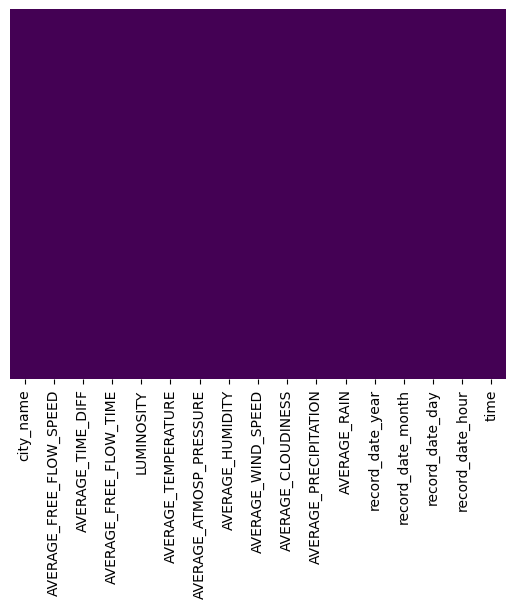

In [1053]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### DATASET test_data.csv

In [1054]:
train.columns

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

In [1055]:
train.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [1056]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       4612 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [1057]:
train.nunique()

city_name                     1
record_date                6812
AVERAGE_SPEED_DIFF            4
AVERAGE_FREE_FLOW_SPEED     225
AVERAGE_TIME_DIFF          1151
AVERAGE_FREE_FLOW_TIME      442
LUMINOSITY                    3
AVERAGE_TEMPERATURE          38
AVERAGE_ATMOSP_PRESSURE      43
AVERAGE_HUMIDITY             77
AVERAGE_WIND_SPEED           15
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                 13
dtype: int64

In [1058]:
train.isnull().sum()

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

<Axes: >

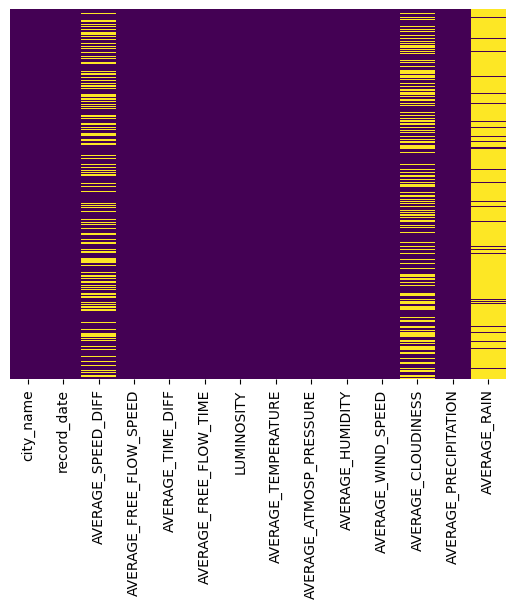

In [1059]:
#Ver heat map de valores nulos
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [1060]:
#Ver a percentagem de valores em falta na coluna AVERAGE_CLOUDINESS
missing = train['AVERAGE_CLOUDINESS'].isna().mean() * 100
print(f'{missing:.2f}% de valores em falta')

39.37% de valores em falta


In [1061]:
#Ver a percentagem de valores em falta na coluna AVERAGE_SPEED_DIFF
missing = train['AVERAGE_SPEED_DIFF'].isna().mean() * 100
print(f'{missing:.2f}% de valores em falta')

32.30% de valores em falta


In [1062]:
#Ver a percentagem de valores em falta na coluna AVERAGE_RAIN
missing = train['AVERAGE_RAIN'].isna().mean() * 100
print(f'{missing:.2f}% de valores em falta')

91.74% de valores em falta


In [1063]:
train['record_date'] = pd.to_datetime(train['record_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
train['record_date'].head()

0   2019-08-29 07:00:00
1   2018-08-10 14:00:00
2   2019-09-01 16:00:00
3   2019-02-26 11:00:00
4   2019-06-06 12:00:00
Name: record_date, dtype: datetime64[ns]

In [1064]:
train['record_date_year'] = train['record_date'].dt.year
train['record_date_month'] = train['record_date'].dt.month
train['record_date_day'] = train['record_date'].dt.day
train['record_date_hour'] = train['record_date'].dt.hour
train['record_date_minute'] = train['record_date'].dt.minute
train['time'] = train['record_date'].dt.time
train.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute,time
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN,2019,8,29,7,0,07:00:00
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN,2018,8,10,14,0,14:00:00
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN,2019,9,1,16,0,16:00:00
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN,2019,2,26,11,0,11:00:00
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN,2019,6,6,12,0,12:00:00


In [1065]:
train.nunique()

city_name                     1
record_date                6812
AVERAGE_SPEED_DIFF            4
AVERAGE_FREE_FLOW_SPEED     225
AVERAGE_TIME_DIFF          1151
AVERAGE_FREE_FLOW_TIME      442
LUMINOSITY                    3
AVERAGE_TEMPERATURE          38
AVERAGE_ATMOSP_PRESSURE      43
AVERAGE_HUMIDITY             77
AVERAGE_WIND_SPEED           15
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                 13
record_date_year              2
record_date_month            12
record_date_day              31
record_date_hour             24
record_date_minute            1
time                         24
dtype: int64

In [1066]:
train.drop(['record_date_minute', 'record_date'], axis=1, inplace=True)
train.head()

,city_name,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,record_date_year,record_date_month,record_date_day,record_date_hour,time
0,Porto,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN,2019,8,29,7,07:00:00
1,Porto,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN,2018,8,10,14,14:00:00
2,Porto,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN,2019,9,1,16,16:00:00
3,Porto,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN,2019,2,26,11,11:00:00
4,Porto,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN,2019,6,6,12,12:00:00


In [1067]:
# Calcular a moda da AVERAGE_CLOUDINESS por cada dia
day_mode = (
    train.groupby('record_date_day')['AVERAGE_CLOUDINESS']
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
)
# Preencher os NaN com a moda do respetivo dia
train['AVERAGE_CLOUDINESS'] = train.apply(
    lambda row: day_mode[row['record_date_day']] 
    if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'],
    axis=1
)
train.head()

,city_name,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,record_date_year,record_date_month,record_date_day,record_date_hour,time
0,Porto,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,nuvens quebrados,0.0,NaN,2019,8,29,7,07:00:00
1,Porto,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN,2018,8,10,14,14:00:00
2,Porto,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,céu claro,0.0,NaN,2019,9,1,16,16:00:00
3,Porto,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN,2019,2,26,11,11:00:00
4,Porto,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,algumas nuvens,0.0,NaN,2019,6,6,12,12:00:00


In [1068]:
# Calcular a moda da AVERAGE_RAIN por cada dia
day_mode = (
    train.groupby('record_date_day')['AVERAGE_RAIN']
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
)
# Preencher os NaN com a moda do respetivo dia
train['AVERAGE_RAIN'] = train.apply(
    lambda row: day_mode[row['record_date_day']] 
    if pd.isna(row['AVERAGE_RAIN']) else row['AVERAGE_RAIN'],
    axis=1
)
train.head()

,city_name,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,record_date_year,record_date_month,record_date_day,record_date_hour,time
0,Porto,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,nuvens quebrados,0.0,chuva fraca,2019,8,29,7,07:00:00
1,Porto,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,chuva fraca,2018,8,10,14,14:00:00
2,Porto,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,céu claro,0.0,chuva moderada,2019,9,1,16,16:00:00
3,Porto,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,chuva fraca,2019,2,26,11,11:00:00
4,Porto,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,algumas nuvens,0.0,chuva fraca,2019,6,6,12,12:00:00


In [1069]:
train.isnull().sum()

city_name                     0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS            0
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN                217
record_date_year              0
record_date_month             0
record_date_day               0
record_date_hour              0
time                          0
dtype: int64

In [1070]:
#Ainda existem valores em falta, mas sao poucos. Vamos preencher com a moda da coluna
mode_rain = train['AVERAGE_RAIN'].mode()[0]
train['AVERAGE_RAIN'] = train['AVERAGE_RAIN'].fillna(mode_rain)
train.isnull().sum()

city_name                     0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS            0
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN                  0
record_date_year              0
record_date_month             0
record_date_day               0
record_date_hour              0
time                          0
dtype: int64

In [1071]:
#NaN em AVERAGE_SPEED_DIFF vai ser preenchido com a moda da coluna
mode_speed_diff = train['AVERAGE_SPEED_DIFF'].mode()[0]
train['AVERAGE_SPEED_DIFF'] = train['AVERAGE_SPEED_DIFF'].fillna(mode_speed_diff)
train.isnull().sum()

city_name                  0
AVERAGE_SPEED_DIFF         0
AVERAGE_FREE_FLOW_SPEED    0
AVERAGE_TIME_DIFF          0
AVERAGE_FREE_FLOW_TIME     0
LUMINOSITY                 0
AVERAGE_TEMPERATURE        0
AVERAGE_ATMOSP_PRESSURE    0
AVERAGE_HUMIDITY           0
AVERAGE_WIND_SPEED         0
AVERAGE_CLOUDINESS         0
AVERAGE_PRECIPITATION      0
AVERAGE_RAIN               0
record_date_year           0
record_date_month          0
record_date_day            0
record_date_hour           0
time                       0
dtype: int64